In [1]:
import os
import sys

# Set the project root directory
project_root = os.path.abspath("..")  # Adjust this based on the notebook's location
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
from calibration import WeightedConformalCalibration, DistanceConformalCalibration
import numpy as np
from calibration import load_calibration

weighted_conditional = WeightedConformalCalibration()
distance_conditional = DistanceConformalCalibration()


Producing conformal plot: data/out/medlfqav2_similarity_a=1.00_weighted_removal_fig.png


100%|██████████| 8/8 [1:07:14<00:00, 504.37s/it]   


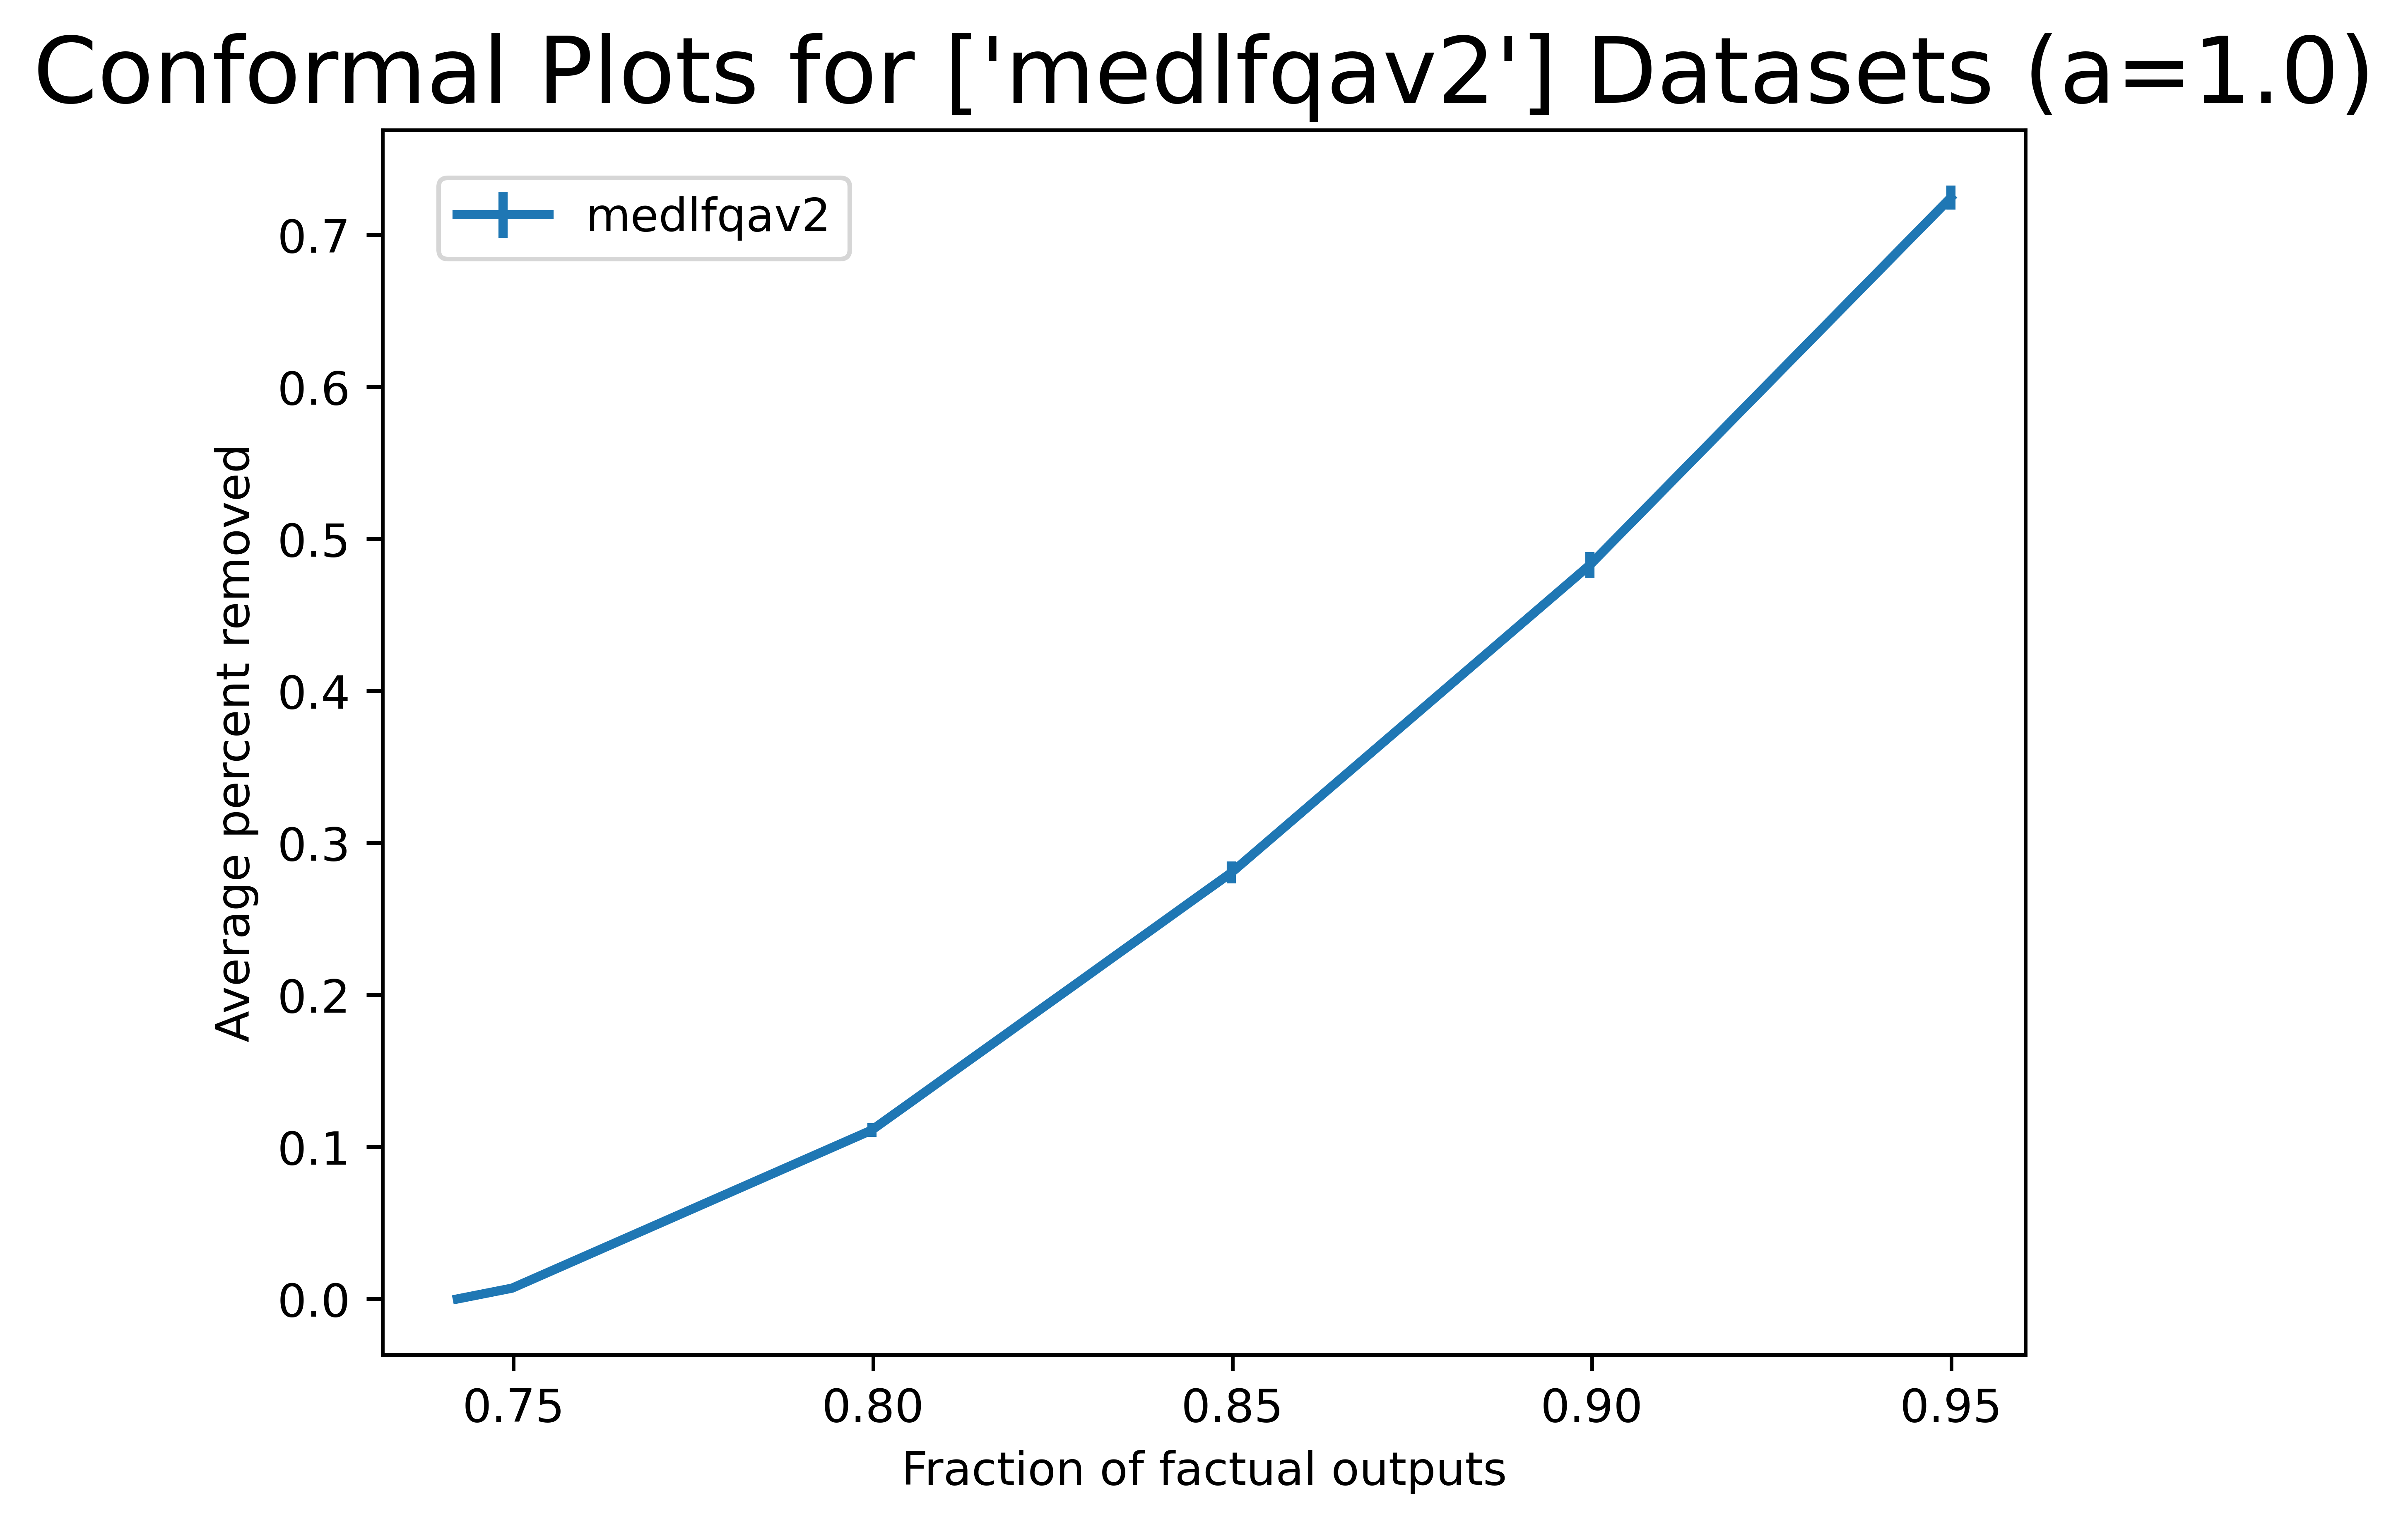

In [3]:

a=1.0
dataset_prefixs = ['medlfqav2'] #option: medication_qa, healthsearch_qa, kqa_golden, kqa_silver_wogold, live_qa， medlfqav2
method = 'similarity'
alphas = np.arange(0.05, 0.45, 0.05)
datasets = {}
for dataset_prefix in dataset_prefixs:
    data = load_calibration(f"data/out/{dataset_prefix}_subclaims_with_scores.jsonl")
    datasets[dataset_prefix] = data

dsprefixs = "_".join(dataset_prefixs)
fig_filename = f"data/out/{dsprefixs}_{method}_a={a:.2f}_weighted_removal_fig.png"
csv_filename = f"data/out/{dsprefixs}_{method}_a={a:.2f}_weighted_removal.csv"
weighted_conditional.calibrate_removal(
    dataset_prefixs, method, datasets, alphas, a, fig_filename, csv_filename
)

Producing calibration plot: data/out/medlfqav2_similarity_a=1.00_calibration_weighted_conditional_fig.png


100%|██████████| 8/8 [14:30:38<00:00, 6529.81s/it]  


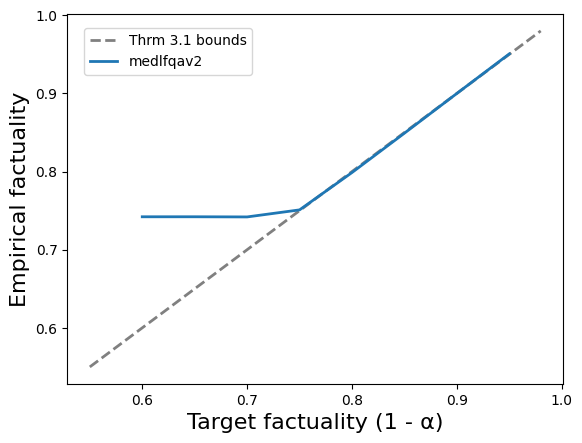

In [3]:

a=1.0
alphas = np.arange(0.05, 0.45, 0.05)
dataset_prefix = 'medlfqav2'
confidence_method = 'similarity'
data = load_calibration(f"data/out/{dataset_prefix}_subclaims_with_scores.jsonl")
fig_filename = f"data/out/{dataset_prefix}_{confidence_method}_a={a:.2f}_calibration_weighted_conditional_fig.png"
csv_filename = f"data/out/{dataset_prefix}_{confidence_method}_a={a:.2f}_calibration_weighted_conditional.csv"
weighted_conditional.calibrate_factual(
    dataset_prefix, confidence_method, data, alphas, a, fig_filename, csv_filename
)

Producing conformal plot: data/out/medlfqav2_similarity_a=1.00_weighted_removal_fig.png


100%|██████████| 8/8 [02:53<00:00, 21.72s/it]


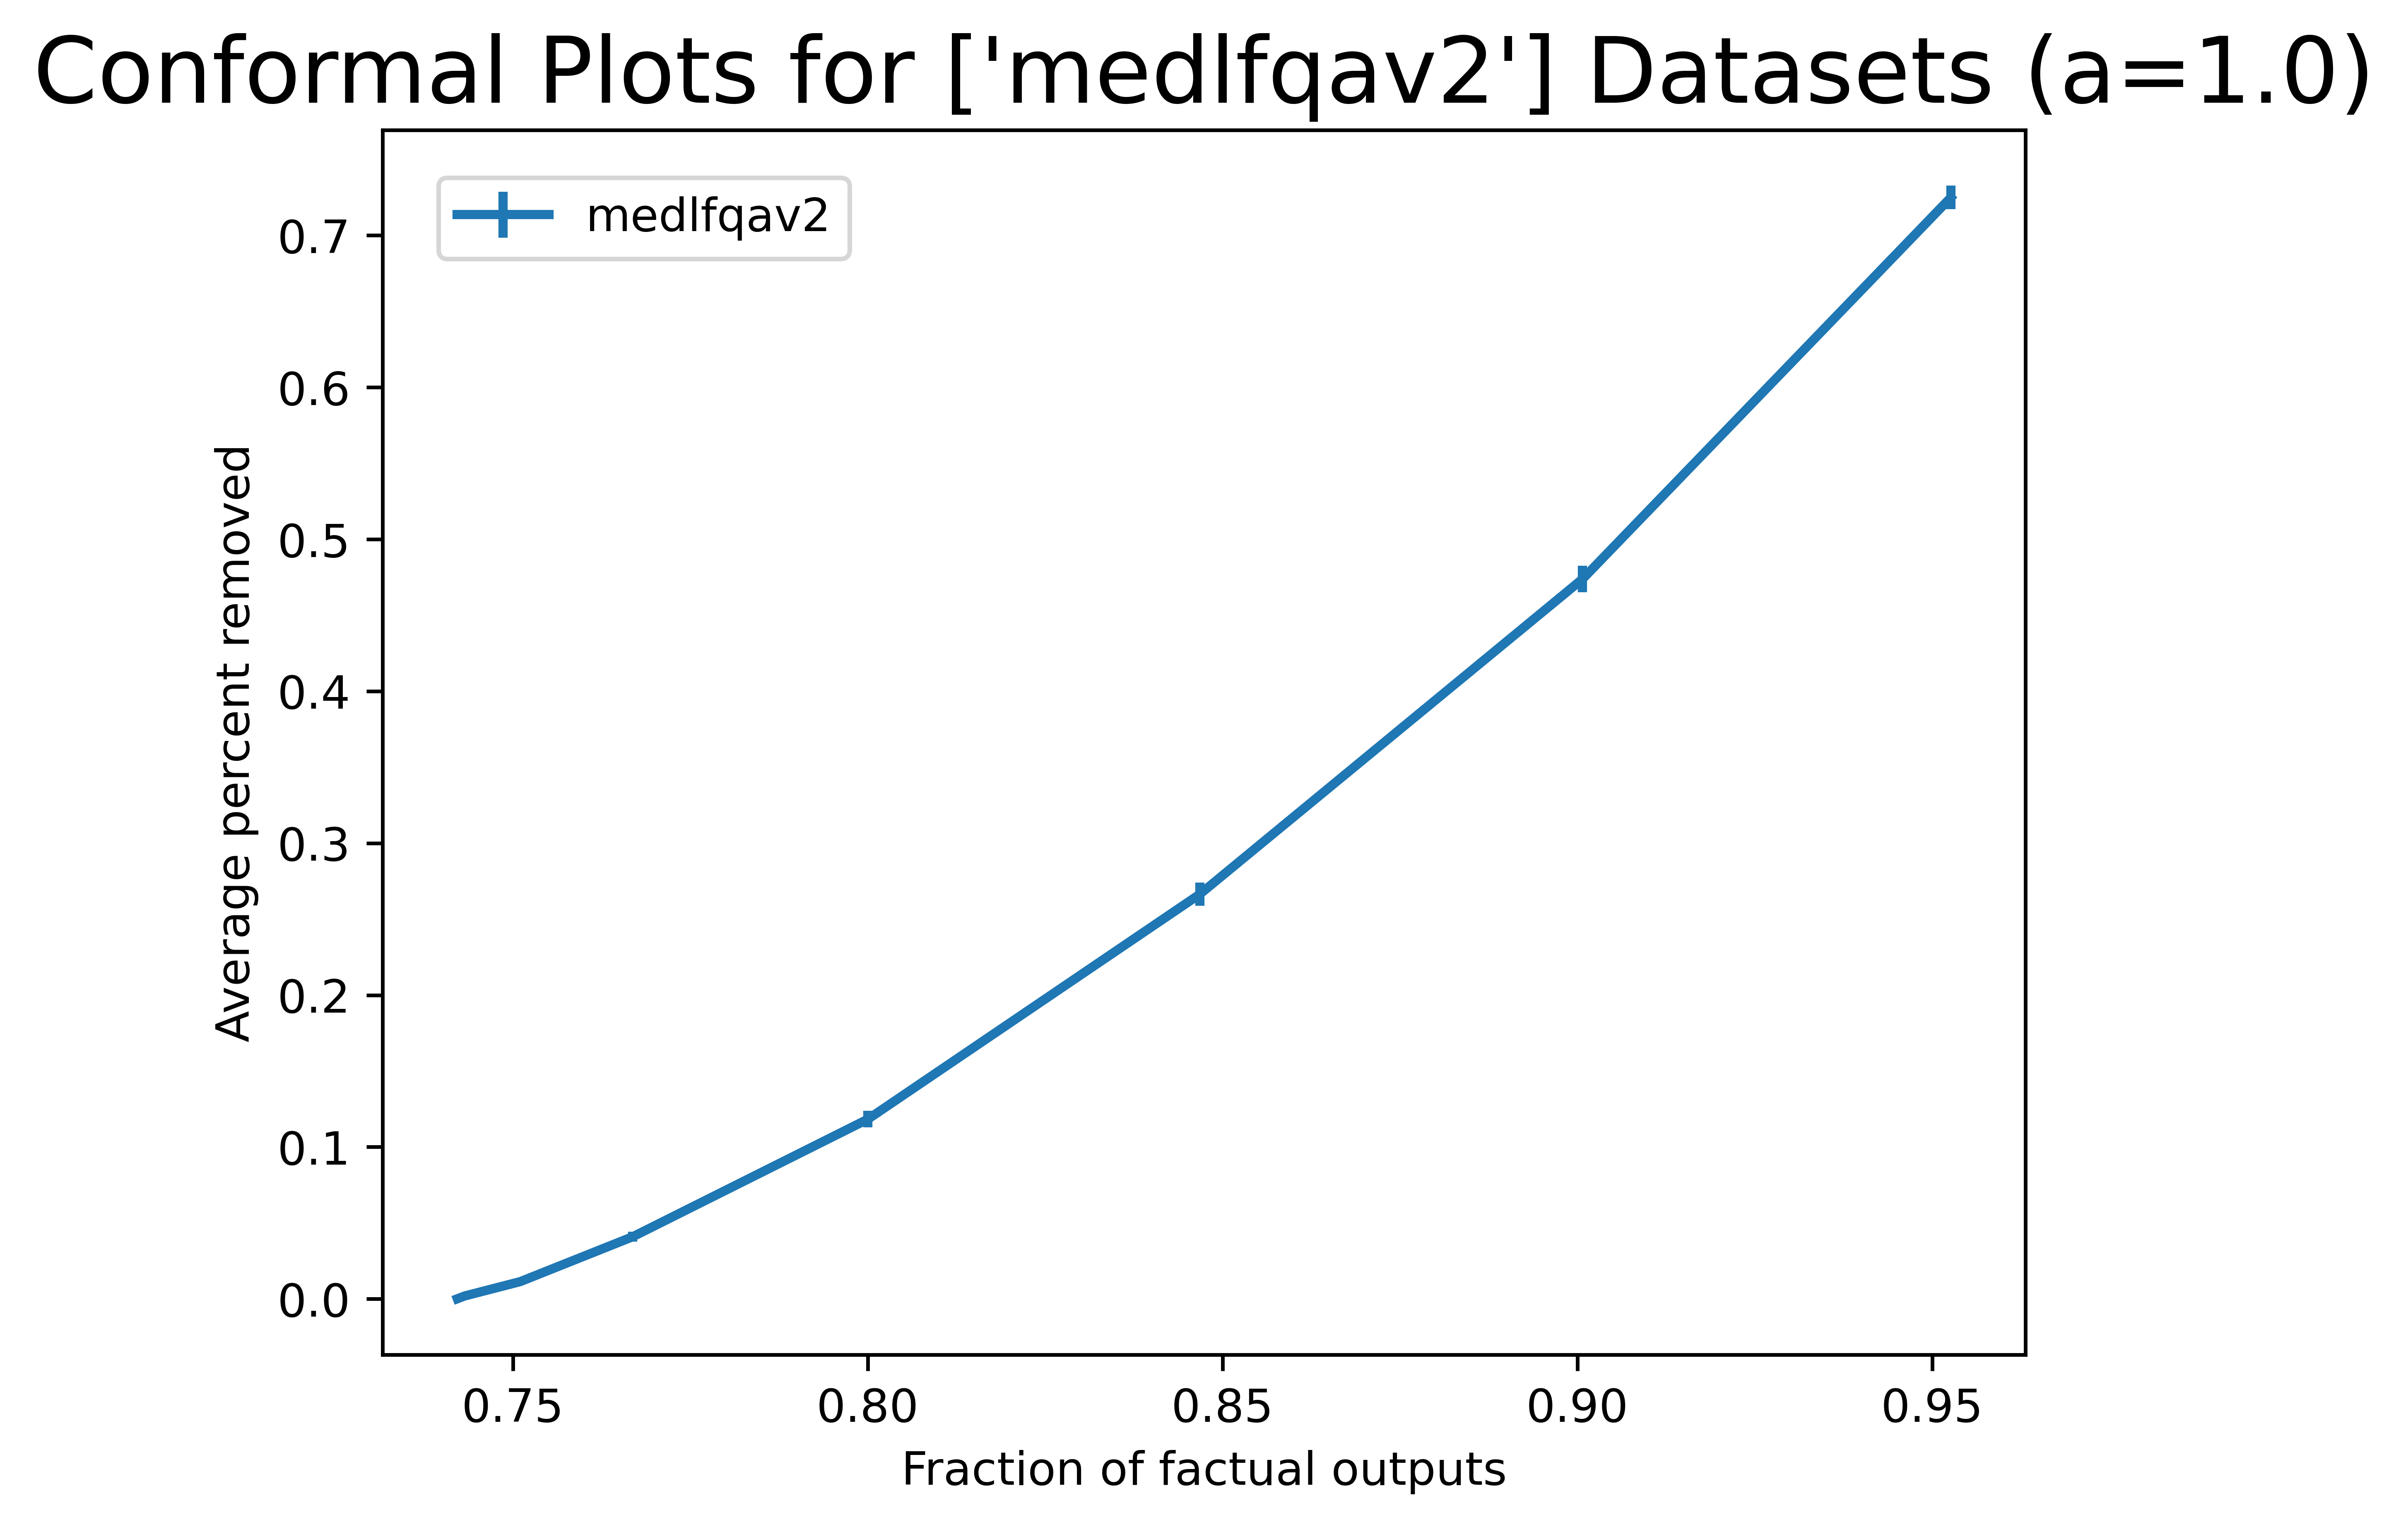

In [7]:

a=1.0
dataset_prefixs = ['medlfqav2'] #option: medication_qa, healthsearch_qa, kqa_golden, kqa_silver_wogold, live_qa， medlfqav2
method = 'similarity'
alphas = np.arange(0.05, 0.45, 0.05)
datasets = {}
for dataset_prefix in dataset_prefixs:
    data = load_calibration(f"data/out/{dataset_prefix}_subclaims_with_scores.jsonl")
    datasets[dataset_prefix] = data

dsprefixs = "_".join(dataset_prefixs)
fig_filename = f"data/out/{dsprefixs}_{method}_a={a:.2f}_weighted_removal_fig.png"
csv_filename = f"data/out/{dsprefixs}_{method}_a={a:.2f}_weighted_removal.csv"
distance_conditional.calibrate_removal(
    dataset_prefixs, method, datasets, alphas, a, fig_filename, csv_filename
)

Producing calibration plot: data/out/medlfqav2_similarity_a=1.00_calibration_weighted_conditional_fig.png


100%|██████████| 8/8 [9:35:06<00:00, 4313.34s/it]  


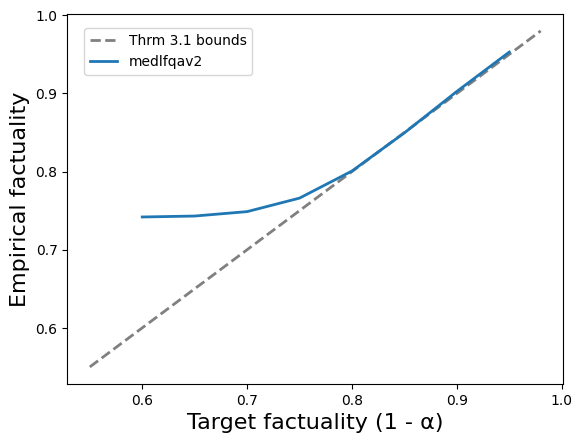

In [6]:

a=1.0
alphas = np.arange(0.05, 0.45, 0.05)
dataset_prefix = 'medlfqav2'
confidence_method = 'similarity'
data = load_calibration(f"data/out/{dataset_prefix}_subclaims_with_scores.jsonl")
fig_filename = f"data/out/{dataset_prefix}_{confidence_method}_a={a:.2f}_calibration_weighted_conditional_fig.png"
csv_filename = f"data/out/{dataset_prefix}_{confidence_method}_a={a:.2f}_calibration_weighted_conditional.csv"
distance_conditional.calibrate_factual(
    dataset_prefix, confidence_method, data, alphas, a, fig_filename, csv_filename
)

# Local conformal VS Group Split Conformal
randomly draw certain amount of data from test data


In [3]:
from calibration import ConformalCalibration, WeightedConformalCalibration
import numpy as np
from calibration import load_calibration

conformal_prediction = ConformalCalibration()
weighted_conditional = WeightedConformalCalibration()

In [9]:
from tqdm import tqdm

a=1.0
alphas = np.arange(0.05, 0.45, 0.05)
dataset_prefix = 'kqa_silver_wogold'
confidence_method = 'similarity'
for alpha in alphas:
    data = load_calibration(f"data/out/{dataset_prefix}_subclaims_with_scores.jsonl")
    fig_filename = f"data/out/partial/conformal/{dataset_prefix}/{confidence_method}_a={a:.2f}_alpha={alpha:.2f}_calibration_partial_factual_fig.png"
    csv_filename = f"data/out/partial/conformal/{dataset_prefix}/{confidence_method}_a={a:.2f}_alpha={alpha:.2f}_calibration_partial_factual.csv"
    conformal_prediction.calibrate_partial_factual(
        dataset_prefix, confidence_method, data, alpha, a, fig_filename, csv_filename, 200
    )

NameError: name 'conformal_prediction' is not defined

  0%|          | 0/8 [03:04<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/Users/naihefeng/Documents/2025/study/layer6/rag_conformal_pred/conditional/data/out/partial/weighted/kqa_silver_wogold/similarity_a=1.00_alpha=0.05_calibration_partial_factual_fig.png'

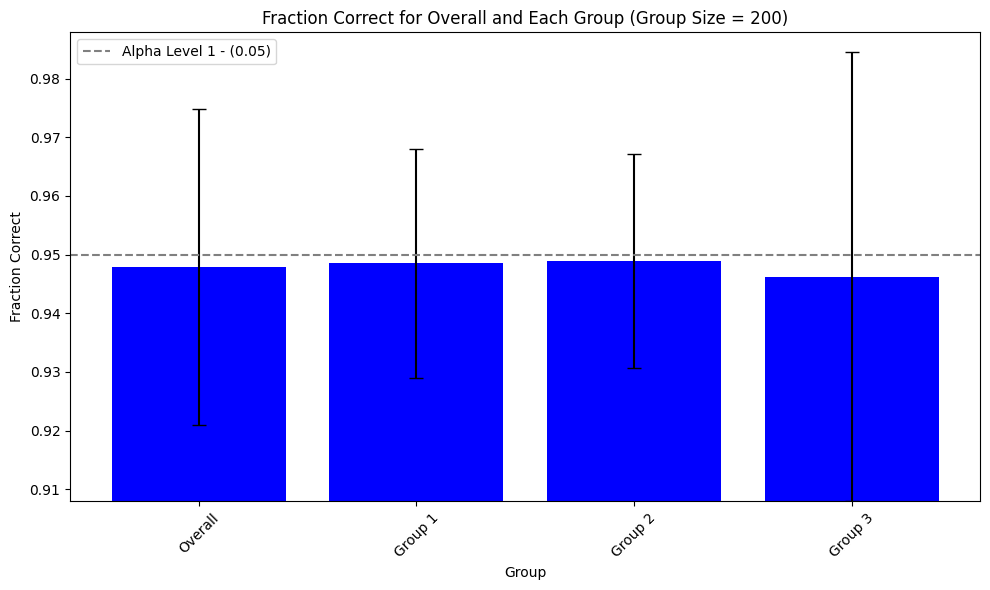

In [8]:
from tqdm import tqdm

a=1.0
alphas = np.arange(0.05, 0.45, 0.05)
dataset_prefix = 'kqa_silver_wogold'
confidence_method = 'similarity'
for alpha in tqdm(alphas):
    data = load_calibration(f"data/out/{dataset_prefix}_subclaims_with_scores.jsonl")
    fig_filename = f"data/out/partial/weighted/{dataset_prefix}/{confidence_method}_a={a:.2f}_alpha={alpha:.2f}_calibration_partial_factual_fig.png"
    csv_filename = f"data/out/partial/weighted/{dataset_prefix}/{confidence_method}_a={a:.2f}_alpha={alpha:.2f}_calibration_partial_factual.csv"
    weighted_conditional.calibrate_partial_factual(
        dataset_prefix, confidence_method, data, alpha, a, fig_filename, csv_filename, 200
    )

# Local Wrighted Calibration

In [2]:
import os
import sys

# Set the project root directory
project_root = os.path.abspath("..")  # Adjust this based on the notebook's location
if project_root not in sys.path:
    sys.path.append(project_root)

Producing conformal plot: data/out/live_qa_similarity_a=1.00_weighted_removal_fig.png


100%|██████████| 8/8 [00:00<00:00, 638.57it/s]


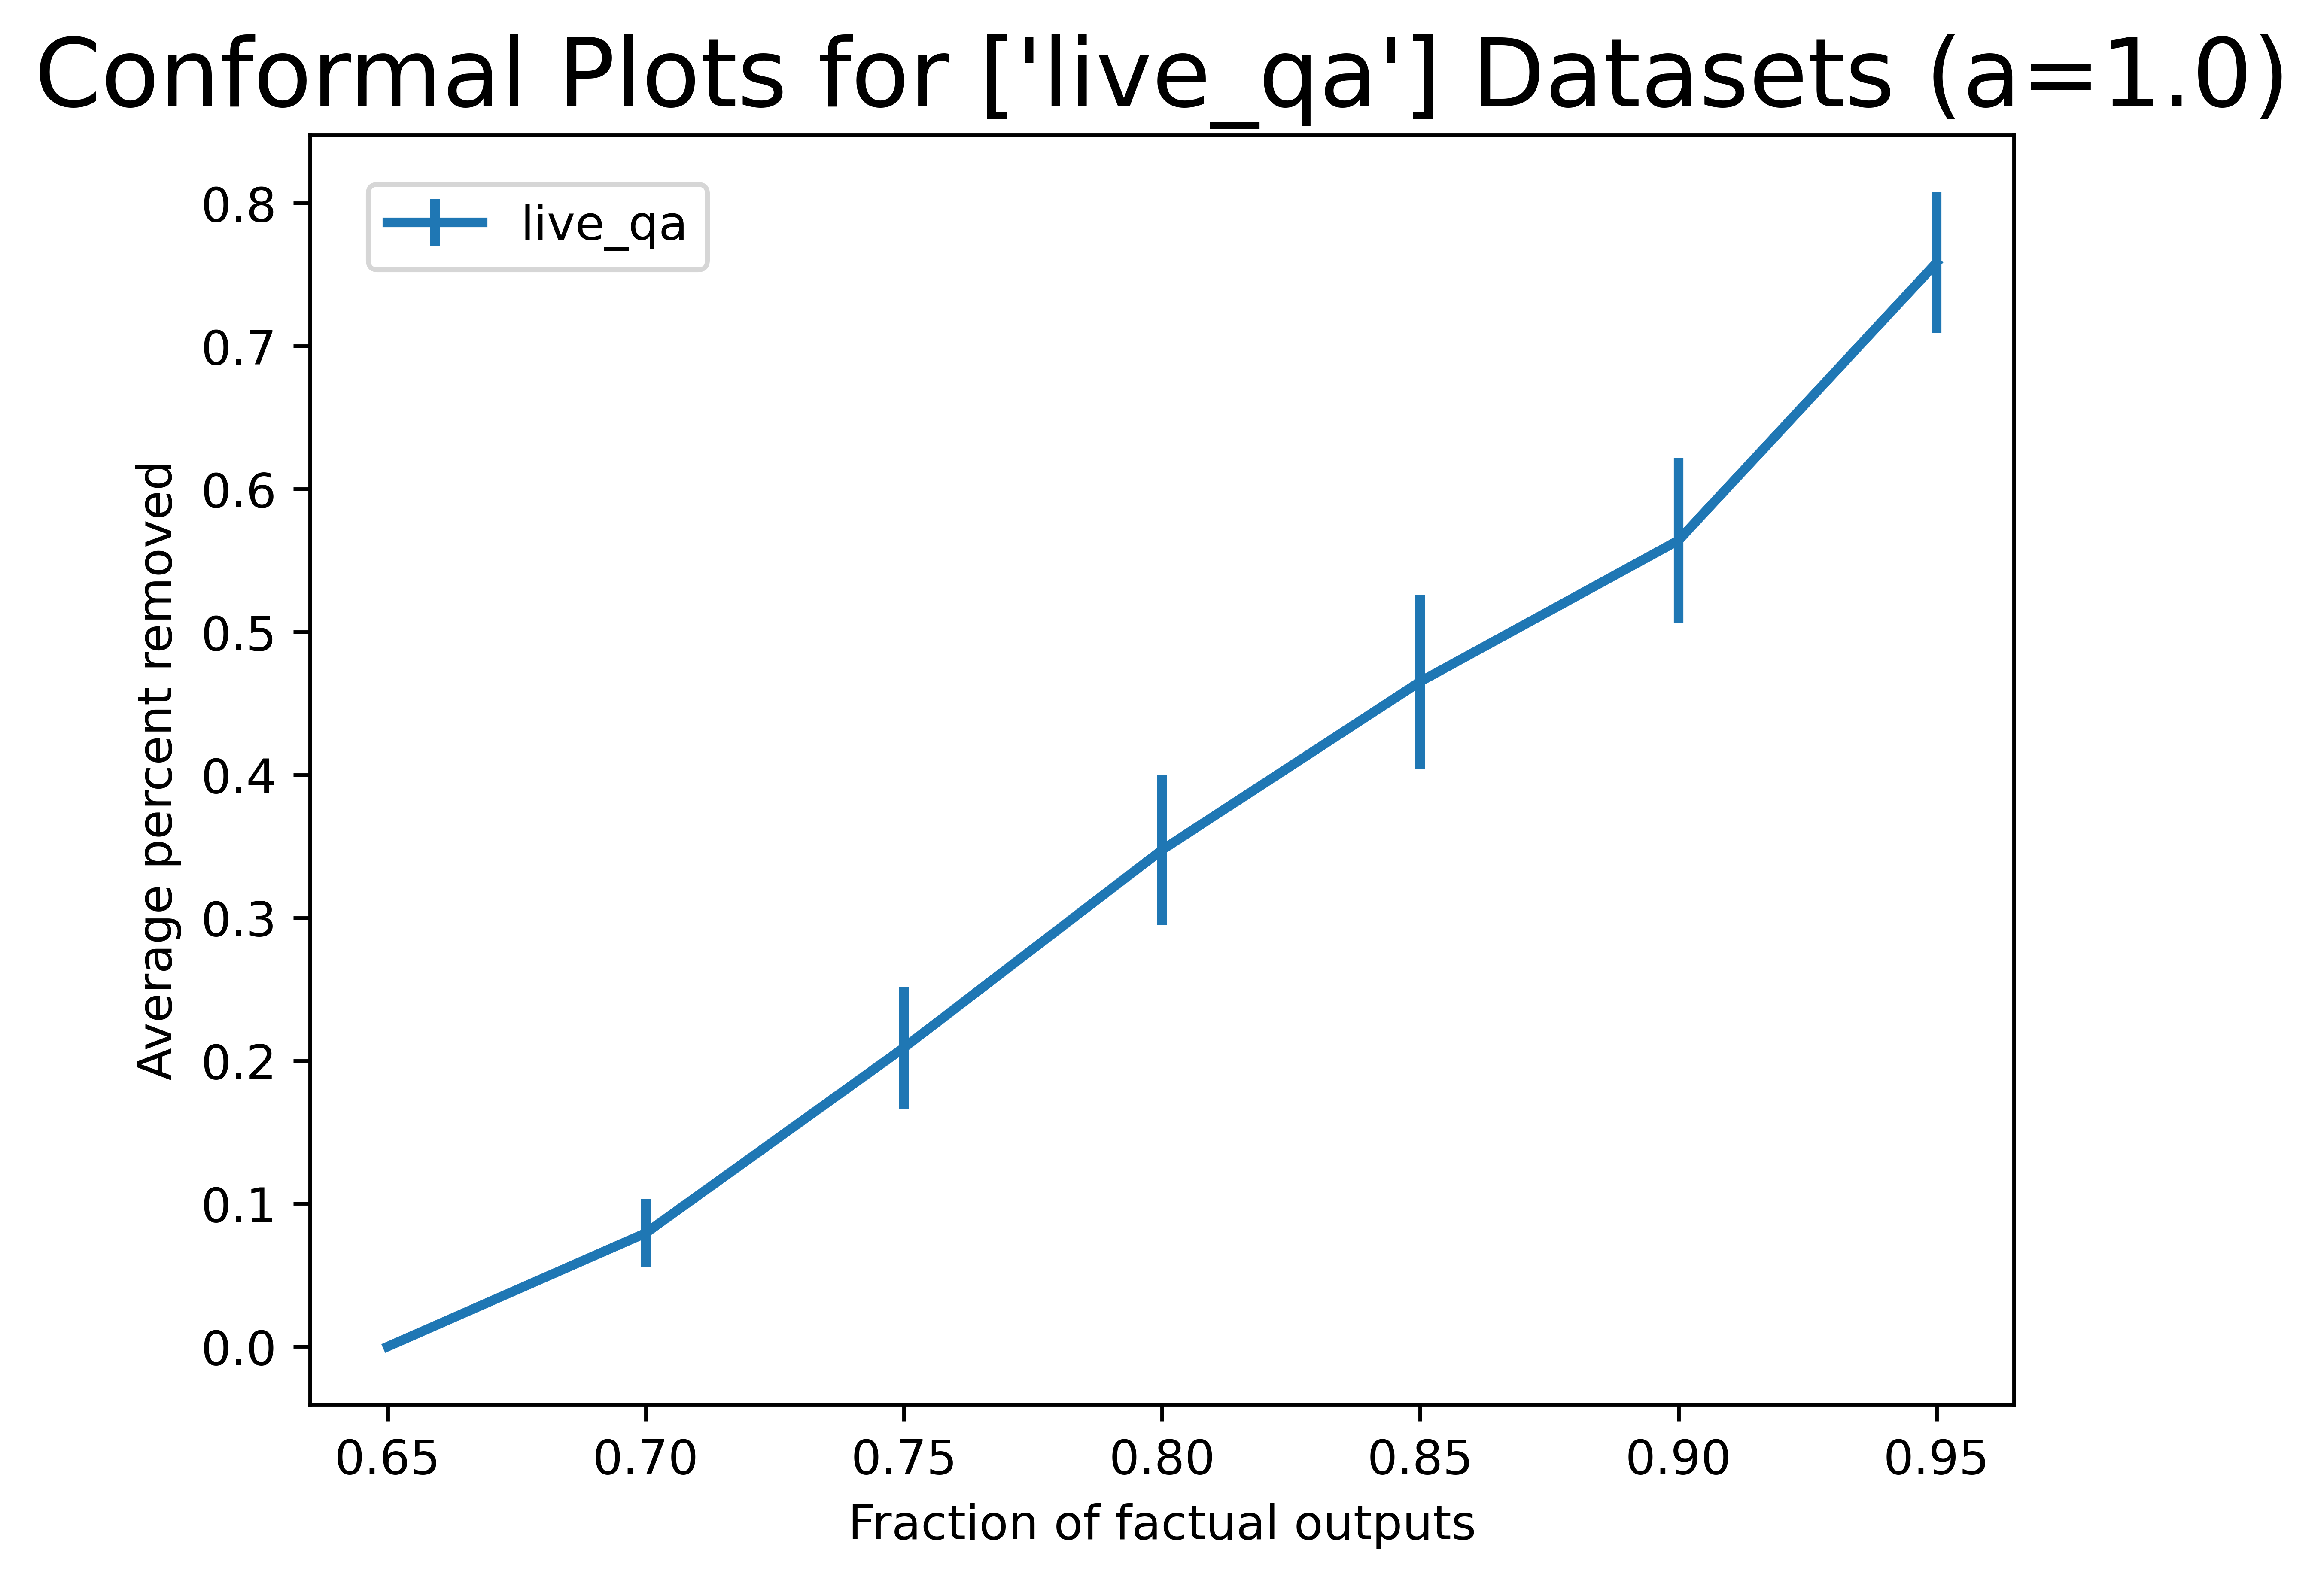

In [3]:
import numpy as np

from local_calibration import LocalDatadependentCalibration
from calibration import load_calibration

local = LocalDatadependentCalibration()
a=1.0
dataset_prefixs = ['live_qa'] #option: medication_qa, healthsearch_qa, kqa_golden, kqa_silver_wogold, live_qa， medlfqav2
method = 'similarity'
alphas = np.arange(0.05, 0.45, 0.05)
datasets = {}
for dataset_prefix in dataset_prefixs:
    data = load_calibration(f"data/out/{dataset_prefix}_subclaims_with_scores.jsonl")
    datasets[dataset_prefix] = data

dsprefixs = "_".join(dataset_prefixs)
fig_filename = f"data/out/{dsprefixs}_{method}_a={a:.2f}_weighted_removal_fig.png"
csv_filename = f"data/out/{dsprefixs}_{method}_a={a:.2f}_weighted_removal.csv"
local.calibrate_removal(
    dataset_prefixs, method, datasets, alphas, a, fig_filename, csv_filename
)

Producing calibration plot: data/out/live_qa_similarity_a=1.00_calibration_weighted_conditional_fig.png


100%|██████████| 8/8 [00:01<00:00,  5.25it/s]


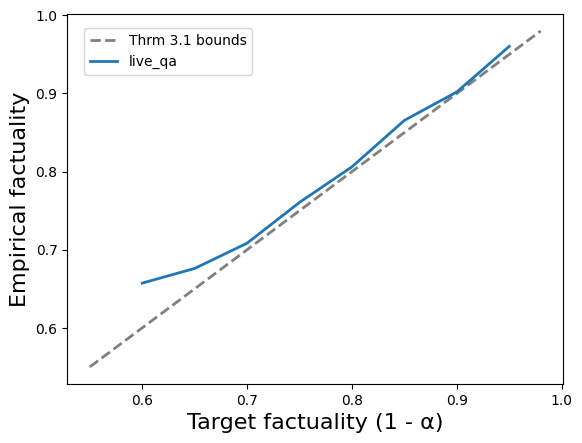

In [ ]:
import numpy as np

from local_calibration import LocalDatadependentCalibration
from calibration import load_calibration

local = LocalDatadependentCalibration()

a=1.0
alphas = np.arange(0.05, 0.45, 0.05)
dataset_prefix = 'live_qa'
confidence_method = 'similarity'
data = load_calibration(f"data/out/{dataset_prefix}_subclaims_with_scores.jsonl")
fig_filename = f"data/out/{dataset_prefix}_{confidence_method}_a={a:.2f}_calibration_weighted_conditional_fig.png"
csv_filename = f"data/out/{dataset_prefix}_{confidence_method}_a={a:.2f}_calibration_weighted_conditional.csv"
local.calibrate_factual(
    dataset_prefix, confidence_method, data, alphas, a, fig_filename, csv_filename
)

In [ ]:
import json

def conditional_coverage_group(data_path, m=3, n=3):
    """
    Divide data prompt into m * n bins where
    m is the number of groups true answers scores divided into
    n is the number of groups top subclaims scores divided into
    
    Returns:
        group: m x n grid of grouped queries
        true_answer_edges: list of m+1 bin edges for true_answer_score
        subclaim_edges: list of n+1 bin edges for top_subclaim_score
    """
    # Read the JSONL file into a list
    data = []
    with open(data_path, 'r') as file:
        for line in file:
            data.append(json.loads(line.strip()))

    true_answer_scores = [max(map(float, item['calibrate_score'])) for item in data]
    top_subclaim_scores = [max([score[1] for score in item["subclaims_score"]]) for item in data]

    min_true, max_true = min(true_answer_scores), max(true_answer_scores)
    min_sub, max_sub = min(top_subclaim_scores), max(top_subclaim_scores)

    interval_true = (max_true - min_true) / m
    interval_sub = (max_sub - min_sub) / n

    # Full bin edges, including min and max
    true_answer_edges = [min_true + i * interval_true for i in range(m + 1)]
    subclaim_edges = [min_sub + i * interval_sub for i in range(n + 1)]

    group = [[[] for _ in range(n)] for _ in range(m)]

    for i in range(len(data)):
        true_score = true_answer_scores[i]
        sub_score = top_subclaim_scores[i]

        # Bin index for true_score
        true_idx = m - 1  # default to last bin
        for k in range(m - 1):
            if true_score < true_answer_edges[k + 1]:
                true_idx = k
                break

        # Bin index for sub_score
        sub_idx = n - 1
        for k in range(n - 1):
            if sub_score < subclaim_edges[k + 1]:
                sub_idx = k
                break

        group[true_idx][sub_idx].append(data[i]["query"])

    return group, true_answer_edges, subclaim_edges


In [23]:
coverage_group, true_answer_edges, subclaim_edges = conditional_coverage_group("data/metadata/medlfqav2_calibrate_score.jsonl",3,3)
# Count the number of queries in each group
print("Number of queries in each group:")
for i in range(len(coverage_group)):
    for j in range(len(coverage_group[i])):
        print(f"Group ({i}, {j}): {len(coverage_group[i][j])} queries")
print("true_answer_edges:", true_answer_edges)
print("subclaim_edges:", subclaim_edges)


Number of queries in each group:
Group (0, 0): 5 queries
Group (0, 1): 721 queries
Group (0, 2): 0 queries
Group (1, 0): 5 queries
Group (1, 1): 2186 queries
Group (1, 2): 847 queries
Group (2, 0): 0 queries
Group (2, 1): 24 queries
Group (2, 2): 292 queries
true_answer_edges: [0.27, 0.44333333333333336, 0.6166666666666667, 0.79]
subclaim_edges: [0.08322421324551105, 0.2874665709276994, 0.49170892860988774, 0.695951286292076]
